In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("/content/drive/MyDrive/ML/ML review/FINAL PROJECT/Problem2_Fruit_classification.csv")
df.head(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
5,5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,bad
6,6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,good
7,7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,good
8,8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,bad
9,9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,bad


In [ ]:
df.shape

(4000, 9)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
A_id,0
Size,0
Weight,0
Sweetness,0
Crunchiness,0
Juiciness,0
Ripeness,0
Acidity,0
Quality,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [ ]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [ ]:
df.describe(percentiles=[0.25,.5,.75,.98,.995]).T

,count,mean,std,min,25%,50%,75%,98%,99.5%,max
A_id,4000.0,1999.500000,1154.844867,0.000000,999.750000,1999.500000,2999.250000,3919.020000,3979.005000,3999.000000
Size,4000.0,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,3.444380,4.303310,6.406367
Weight,4000.0,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,2.314247,3.440909,5.790714
Sweetness,4000.0,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,3.664083,4.637913,6.374916
Crunchiness,4000.0,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,3.844603,4.759993,7.619852
Juiciness,4000.0,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,4.269074,5.363839,7.364403
Ripeness,4000.0,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,4.379014,5.254182,7.237837
Acidity,4000.0,0.076877,2.110270,-7.010538,-1.377424,0.022609,1.510493,4.406446,5.552359,7.404736


In [ ]:
df['Quality'].value_counts()

,count
Quality,
good,2004
bad,1996


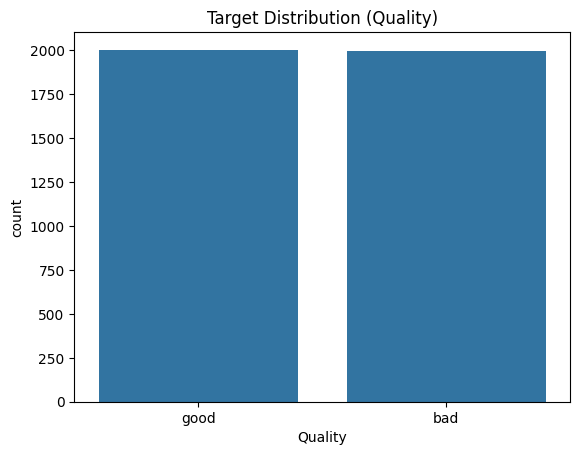

In [ ]:
sns.countplot(x='Quality', data=df)
plt.title('Target Distribution (Quality)')
plt.show()

array([[<Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Sweetness'}>],
       [<Axes: title={'center': 'Crunchiness'}>,
        <Axes: title={'center': 'Juiciness'}>,
        <Axes: title={'center': 'Ripeness'}>],
       [<Axes: title={'center': 'Acidity'}>, <Axes: >, <Axes: >]],
      dtype=object)

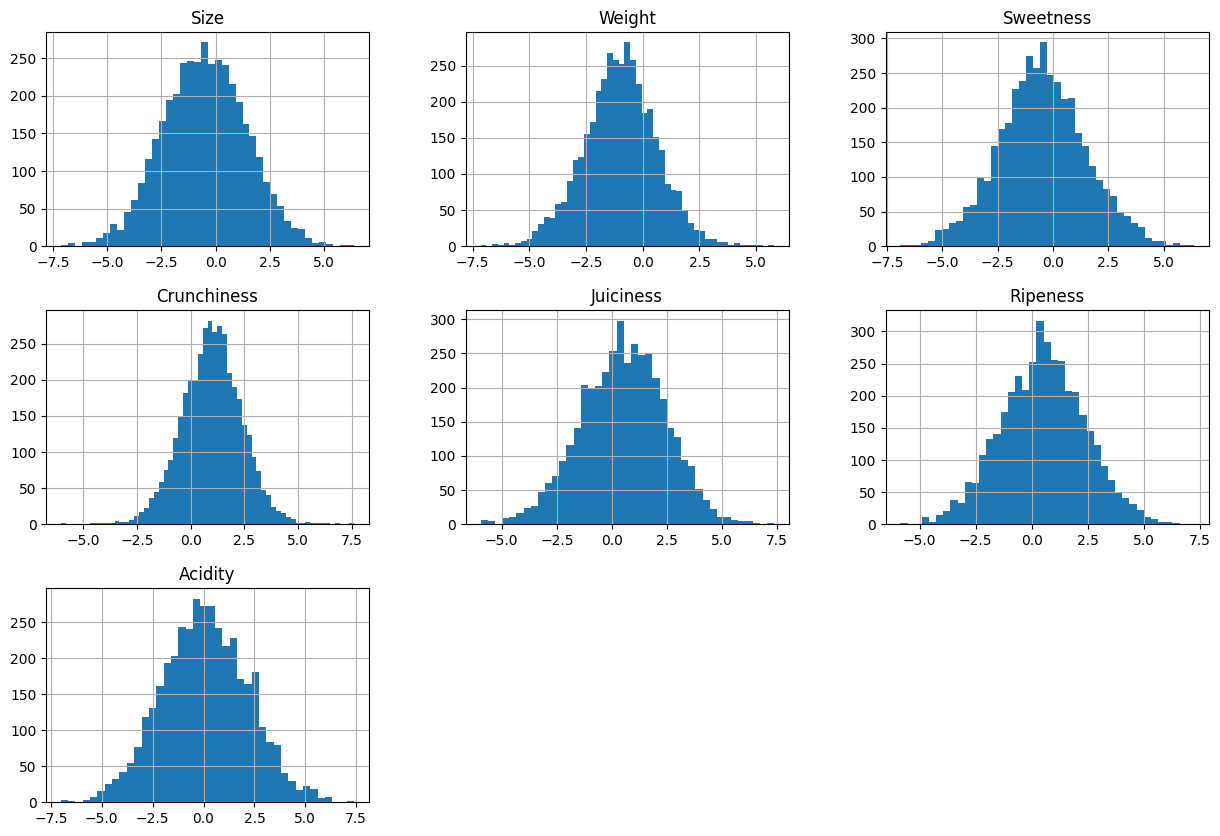

In [ ]:
df.drop("A_id", axis = 1).hist(bins='auto', figsize=(15, 10), layout=(3, 3), xlabelsize=10, ylabelsize=10)

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
le = LabelEncoder()

In [5]:
df1 = df.copy()
df1.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [6]:
df1['Quality'] = le.fit_transform(df1['Quality'])

In [ ]:
df1.tail()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3995,3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1
3999,3999,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796,1


In [ ]:
df1.corr().style.background_gradient(cmap='YlOrRd').format(precision=2)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
A_id,1.00,-0.03,-0.01,-0.00,-0.01,0.01,0.00,-0.02,0.00
Size,-0.03,1.00,-0.17,-0.32,0.17,-0.02,-0.13,0.20,0.24
Weight,-0.01,-0.17,1.00,-0.15,-0.10,-0.09,-0.24,0.02,0.00
Sweetness,-0.00,-0.32,-0.15,1.00,-0.04,0.10,-0.27,0.09,0.25
Crunchiness,-0.01,0.17,-0.10,-0.04,1.00,-0.26,-0.20,0.07,-0.01
Juiciness,0.01,-0.02,-0.09,0.10,-0.26,1.00,-0.10,0.25,0.26
Ripeness,0.00,-0.13,-0.24,-0.27,-0.20,-0.10,1.00,-0.20,-0.26
Acidity,-0.02,0.20,0.02,0.09,0.07,0.25,-0.20,1.00,-0.01
Quality,0.00,0.24,0.00,0.25,-0.01,0.26,-0.26,-0.01,1.00


In [7]:
df['Quality'] = le.fit_transform(df['Quality'])

In [8]:
X = df.drop(columns=['A_id', 'Quality'])
y = df['Quality']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3200, 7)
Shape of X_test: (800, 7)
Shape of y_train: (3200,)
Shape of y_test: (800,)


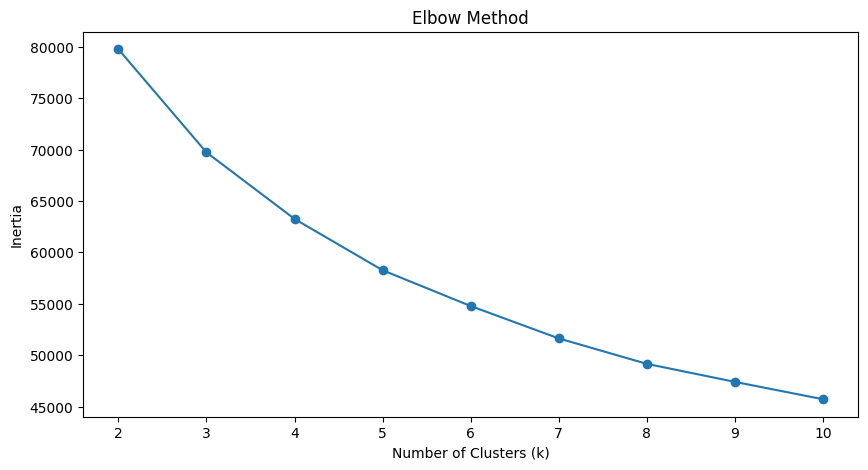

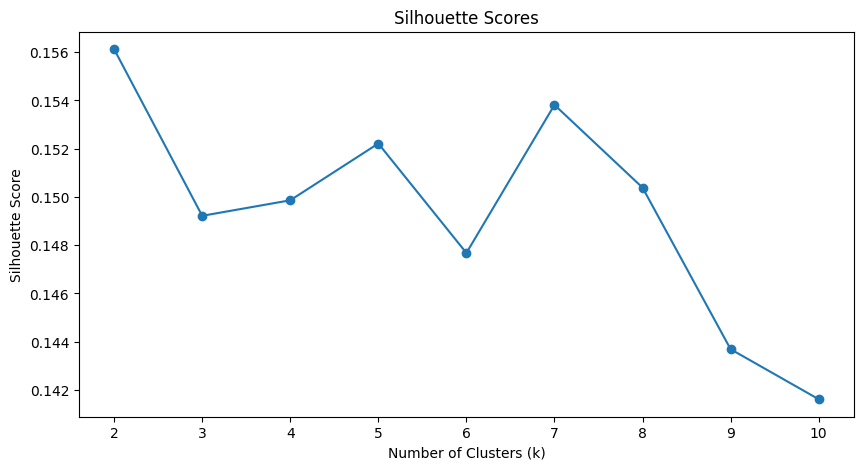

The best k based on silhouette score is: 2


In [ ]:
# Determine the optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
k_values = range(2, 11)  # Try different k values from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot the elbow curve
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Print the best k based on silhouette score
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"The best k based on silhouette score is: {best_k}")


According to the Silhouette Scores, the best k, is 2, but based on the elbow method, I believe that the best k is 5.


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Variance explained by the first 2 principal components: {explained_variance * 100:.2f}%")

Variance explained by the first 2 principal components: 46.88%


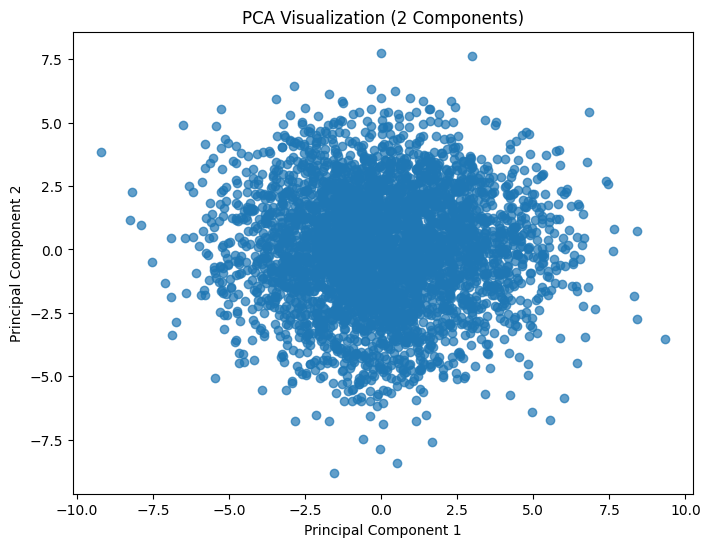

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, cmap='viridis')
plt.title('PCA Visualization (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Nearly 47% of the variance in the dataset is captured by the first two principal components.

Leaving over 50% unexplained.

The plot is symmetric around the center, reflecting well-centered and scaled data.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from xgboost import XGBClassifier

Logistic Regression AUC-ROC: 0.8231
Random Forest AUC-ROC: 0.9582
XGBoost AUC-ROC: 0.9645
Gradient Boosting AUC-ROC: 0.9397


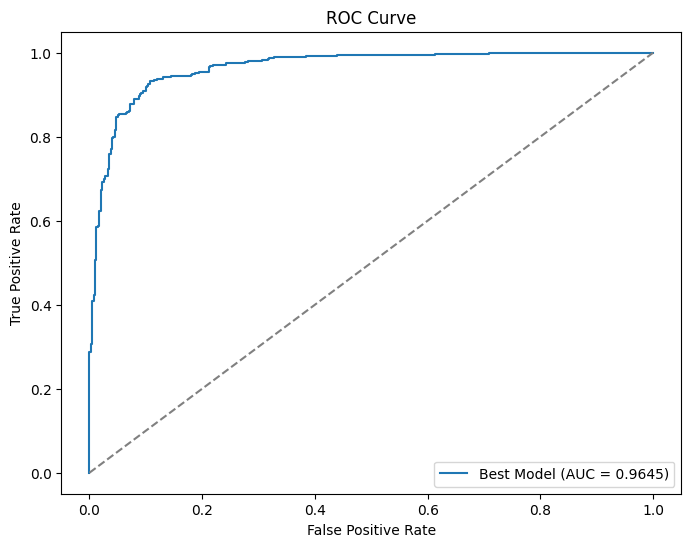

In [15]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Train and evaluate models
best_model = None
best_auc = 0
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC

    # Evaluate AUC-ROC
    auc = roc_auc_score(y_test, y_prob)
    print(f"{name} AUC-ROC: {auc:.4f}")

    if auc > best_auc:
        best_model = model
        best_auc = auc

# Plot ROC curve for the best model
y_prob_best = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Best Model (AUC = {best_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Therefore, we can see that the best model to classify the target of the dataset is XGBoostClassifier model, at AUC = 0.9645.